# Manish Sharma
### Data Science and Business Analytic Intern @ The Sparks Foundation

## Exploratory Data Analysis - Sports

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


### Data Exploration

In [4]:
matches.shape

(756, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
deliveries.shape

(41304, 21)

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41304 entries, 0 to 41303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          41304 non-null  int64  
 1   inning            41304 non-null  int64  
 2   batting_team      41304 non-null  object 
 3   bowling_team      41304 non-null  object 
 4   over              41304 non-null  int64  
 5   ball              41304 non-null  int64  
 6   batsman           41304 non-null  object 
 7   non_striker       41304 non-null  object 
 8   bowler            41304 non-null  object 
 9   is_super_over     41304 non-null  int64  
 10  wide_runs         41304 non-null  int64  
 11  bye_runs          41303 non-null  float64
 12  legbye_runs       41303 non-null  float64
 13  noball_runs       41303 non-null  float64
 14  penalty_runs      41303 non-null  float64
 15  batsman_runs      41303 non-null  float64
 16  extra_runs        41303 non-null  float6

In [9]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,41304.000000,41304.000000,41304.000000,41304.000000,41304.000000,41304.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000
mean,88.565224,1.478404,10.075852,3.625218,0.000581,0.039173,0.005060,0.023509,0.004939,0.000121,1.223253,0.072803,1.296056
std,51.053405,0.501860,5.668132,1.814553,0.024098,0.257781,0.114971,0.205499,0.074460,0.024602,1.607151,0.353393,1.594700
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,133.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,176.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


In [10]:
merge = pd.merge(deliveries,matches, left_on='match_id', right_on ='id') #Merging both dataset
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [11]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41304 entries, 0 to 41303
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          41304 non-null  int64  
 1   inning            41304 non-null  int64  
 2   batting_team      41304 non-null  object 
 3   bowling_team      41304 non-null  object 
 4   over              41304 non-null  int64  
 5   ball              41304 non-null  int64  
 6   batsman           41304 non-null  object 
 7   non_striker       41304 non-null  object 
 8   bowler            41304 non-null  object 
 9   is_super_over     41304 non-null  int64  
 10  wide_runs         41304 non-null  int64  
 11  bye_runs          41303 non-null  float64
 12  legbye_runs       41303 non-null  float64
 13  noball_runs       41303 non-null  float64
 14  penalty_runs      41303 non-null  float64
 15  batsman_runs      41303 non-null  float64
 16  extra_runs        41303 non-null  float6

In [12]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,41304.000000,41304.000000,41304.000000,41304.000000,41304.000000,41304.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000,41303.000000,41304.000000,41304.000000,41304.000000,41304.000000,41304.000000
mean,88.565224,1.478404,10.075852,3.625218,0.000581,0.039173,0.005060,0.023509,0.004939,0.000121,1.223253,0.072803,1.296056,88.565224,2011.366696,0.023484,12.871707,3.325925
std,51.053405,0.501860,5.668132,1.814553,0.024098,0.257781,0.114971,0.205499,0.074460,0.024602,1.607151,0.353393,1.594700,51.053405,4.026550,0.151438,24.944264,3.410855
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,2008.000000,0.000000,0.000000,0.000000
50%,88.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,88.000000,2009.000000,0.000000,0.000000,3.000000
75%,133.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,133.000000,2017.000000,0.000000,14.000000,6.000000
max,176.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000,176.000000,2017.000000,1.000000,146.000000,10.000000


### Data Visualization
#### No. of times each team has won

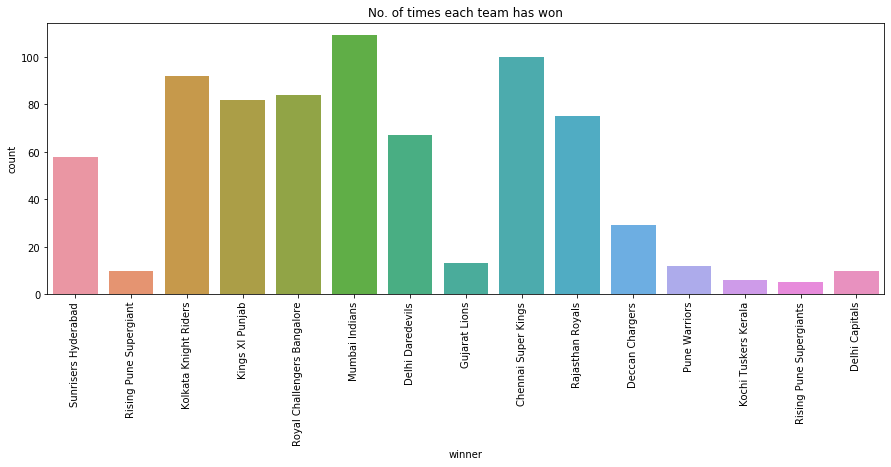

In [16]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'winner', data = matches)
plt.title('No. of times each team has won')
plt.xticks(rotation = 90);

#### Player who has won the Man of the Match award more no. of times

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

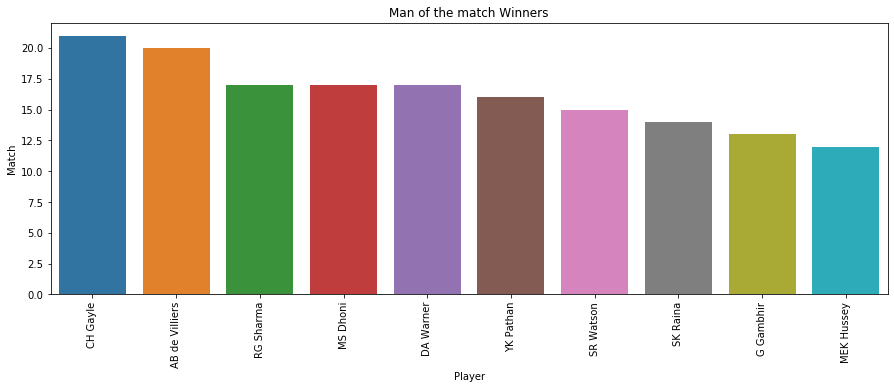

In [17]:
plt.figure(figsize = (15,5))
sns.barplot(x= matches.player_of_match.value_counts()[:10].index, y= matches.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 90)

#### No. of times a Captain has won a match

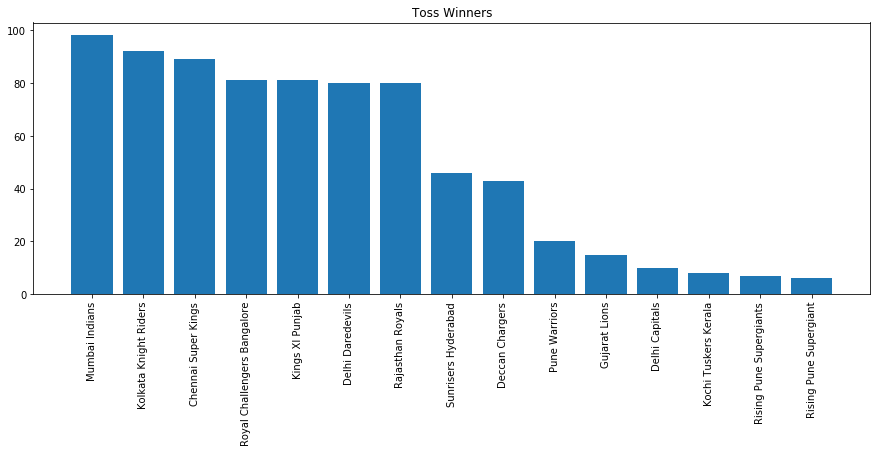

In [18]:
plt.figure(figsize=(15,5))
plt.bar(list(matches['toss_winner'].value_counts().keys()),list(matches['toss_winner'].value_counts()))
plt.title('Toss Winners')
plt.xticks(rotation = 90)
plt.show()

#### No. of times a team has won after batting first

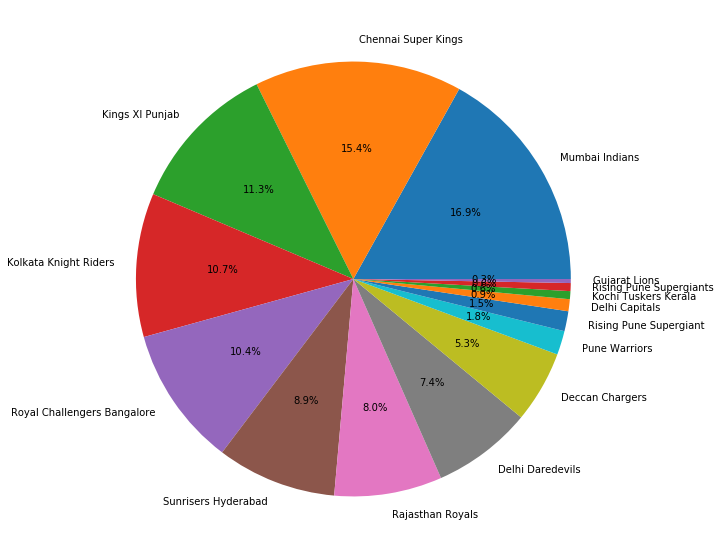

In [21]:
batting_first = matches[matches['win_by_runs']!=0]
plt.figure(figsize=(15,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
plt.show()

#### No. of times a team has won after bolling first

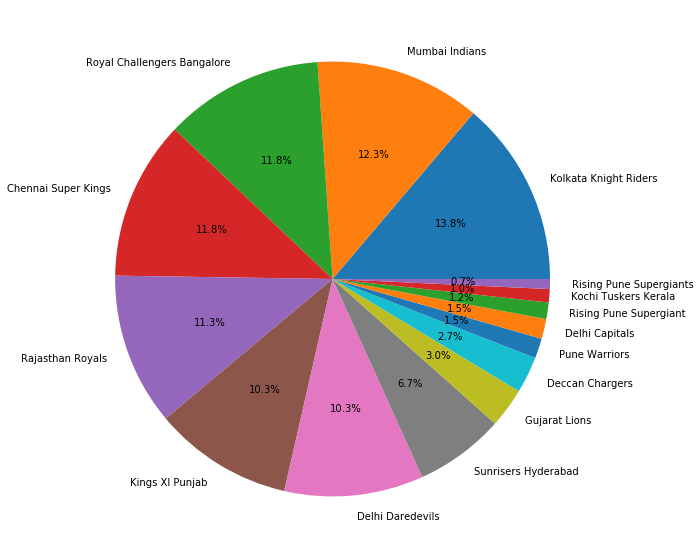

In [24]:
bolling_first = matches[matches['win_by_wickets']!=0]
plt.figure(figsize = (15,10))
plt.pie(list(bolling_first['winner'].value_counts()), labels=list(bolling_first['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()

#### No. of matches played in each season

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Season')

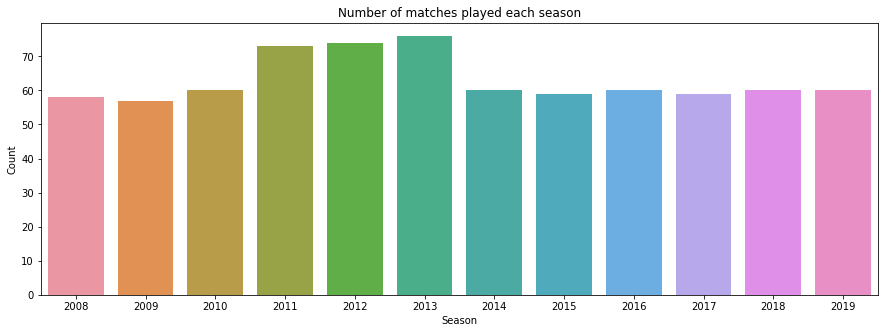

In [27]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season")
plt.ylabel("Count")
plt.xlabel("Season")

#### No. of teams played in each season

Text(0.5, 0, 'Season')

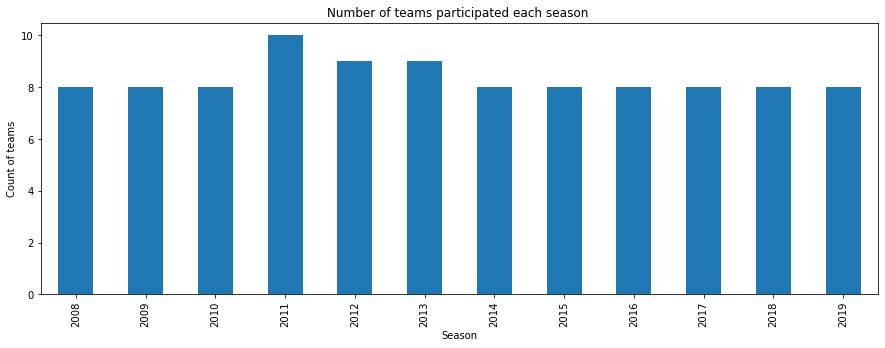

In [28]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ")
plt.ylabel("Count of teams")
plt.xlabel("Season")

#### Venues where most number of matches are played

Text(0.5, 0, 'Frequency')

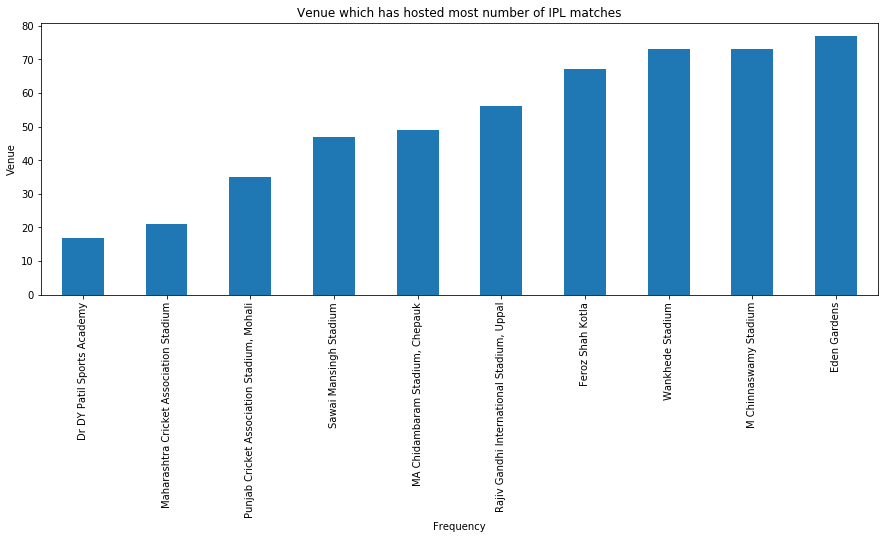

In [31]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar',figsize=(15,5))
plt.title("Venue which has hosted most number of IPL matches")
plt.ylabel("Venue")
plt.xlabel("Frequency")

#### Players who have gained maximum runs in matches

Text(0, 0.5, 'Total Runs Scored')

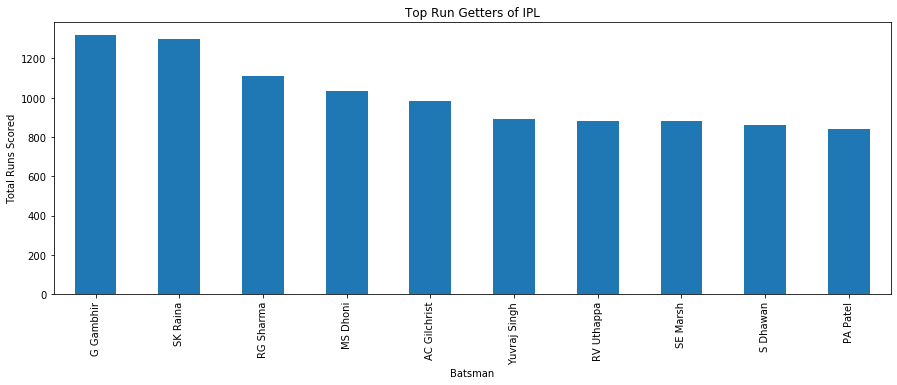

In [32]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar',figsize = (15,5))
plt.title("Top Run Getters of IPL")
plt.xlabel("Batsman")
plt.ylabel("Total Runs Scored")

#### Players who has taken the most wickets

Text(0, 0.5, 'Total Wickets Taken')

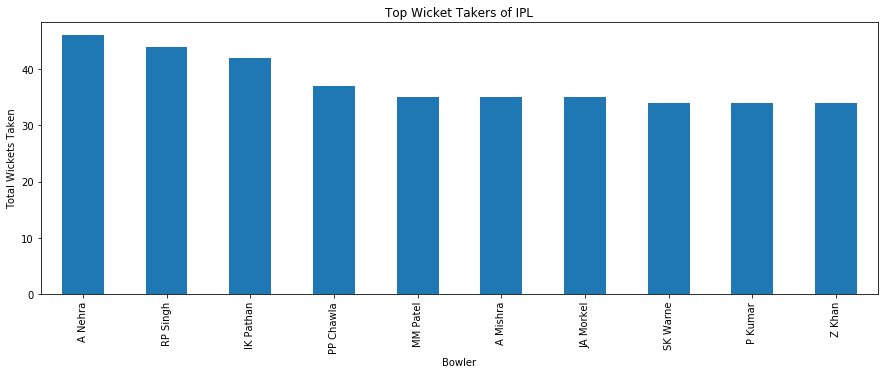

In [35]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (15,5))
plt.title("Top Wicket Takers of IPL")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")

### Conclusion:
* Mumbai Indians is the most successful team in IPL and has won the most number of toss.
* Chris Gayle has won the maximum number of player of the match title.
* Eden Gardens has hosted the maximum number of IPL matches.
* A Nehra has taken most number of wickets.
* G Gambhir has gained maximum runs.
* Mumbai Indians has won the most number of IPL matches.